In [26]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

In [19]:
labels = ['cats', 'dogs']
img_size = 150

def get_data(data_dir):
    data = []
    if(data_dir.find('/test') != -1):
        path = data_dir
        for index, img in enumerate(os.listdir(path)):
            img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            resized_arr = cv2.resize(img_arr, (img_size, img_size))
            data.append([resized_arr, index])
    else:
        for index, label in enumerate(labels):
            path = os.path.join(data_dir, label)
            for img in os.listdir(path):
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, index])
    return np.array(data)

In [20]:
train = get_data('./datasets/train')
val = get_data('./datasets/val')
test = get_data('./datasets/test')

print(len(train))
print(len(test))
print(len(val))

C:\Users\VIJUL\AppData\Local\Temp/ipykernel_14476/3079775686.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


23000
12500
2000


In [21]:
# Data Preprocessing and Data Augmentation

x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [22]:
# NORMALIZE THE DATA
# ======================
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

# resize data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

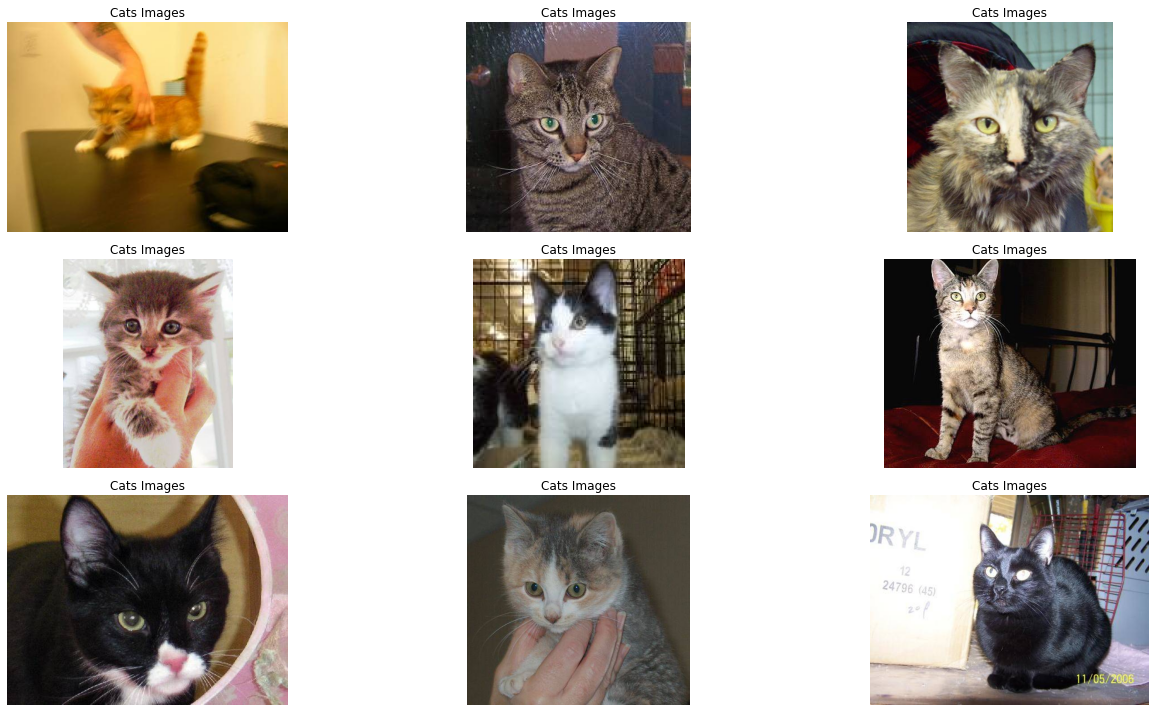

In [24]:
# Let's check out the dataset we're working on by picking out images of two data points from the dataset.
cats = os.listdir("./datasets/train/cats")
cats_dir = "./datasets/train/cats"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(cats_dir, cats[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title("Cats Images") 
plt.tight_layout()

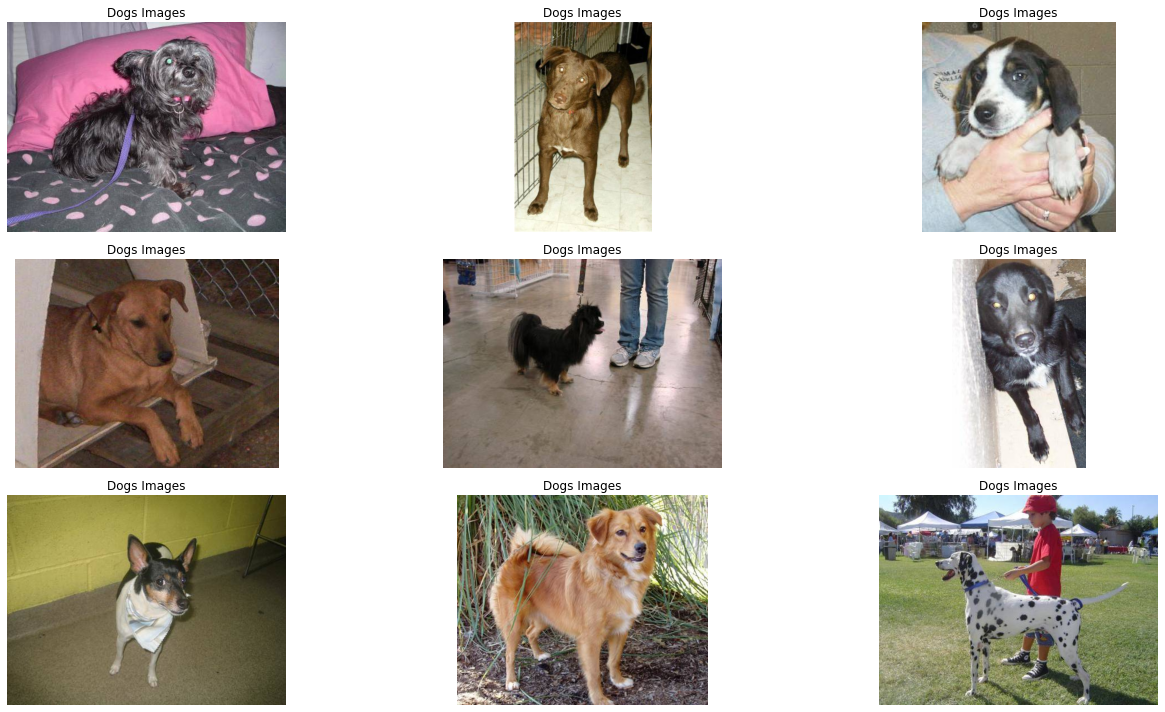

In [25]:
dogs = os.listdir("./datasets/train/dogs")
dogs_dir = "./datasets/train/dogs"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(dogs_dir, dogs[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title("Dogs Images") 
plt.tight_layout()

C:\Users\VIJUL\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

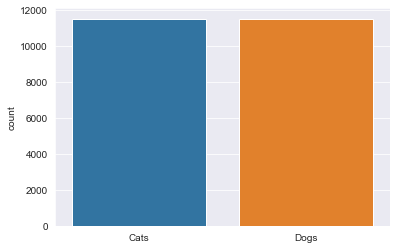

In [27]:
# check out the number of data points we are working with in the dataset
list = []
for i in train:
    if(i[1] == 0):
        list.append("Cats")
    else:
        list.append("Dogs")
sns.set_style('darkgrid')
sns.countplot(list)   